In [18]:
import re
from pathlib import Path
from itertools import chain

import yaml
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [65]:
# ptn_exper = re.compile(r'(?P<hp_idx>\d+)_hp_idx_split_(?P<split>\d+)_of_\d+/version_(?P<version>\d+)')
ptn_exper = re.compile(r'(?P<hp_idx>\d+)_hp_idx_split_(?P<split>\d+)_of_\d+/version_')

In [66]:
dir_proj = Path('/projects/b1039/trw7841')
dir_evals = dir_proj / 'hiec/artifacts/model_evals/gnn'
dir_logs = Path('/home/trw7841/src/catalytic-function/logs/')

fp_experiments = dir_evals / 'experiments.csv'

In [67]:
df_experiments = pd.read_table(fp_experiments, index_col=0).rename_axis('hp_idx')
df_experiments.tail()

,n_epochs,pred_head,message_passing,agg,d_h_encoder,model,featurizer,encoder_depth,toc,n_splits,split_strategy,neg_multiple,embed_type,seed,dataset_name,split_sim_threshold,embed_dim
hp_idx,,,,,,,,,,,,,,,,,
281,5,dot_sig,bondwise,last,300,mpnn_dim_red,rxn_rc,NaN,v3_folded_pt_ns,5,homology,1,esm,1234,sprhea,0.8,1280
282,5,binary,bondwise,last,50,mpnn_dim_red,rxn_rc,NaN,v3_folded_pt_ns,5,homology,1,esm,1234,sprhea,0.8,1280
283,5,binary,bondwise,last,300,mpnn_dim_red,rxn_rc,NaN,v3_folded_pt_ns,5,homology,1,esm,1234,sprhea,0.8,1280
284,2,dot_sig,bondwise,last,50,mpnn_dim_red,rxn_rc,3.0,v3_folded_pt_ns,5,homology,1,esm,1234,sprhea,0.8,1280
285,2,binary,bondwise,last,50,mpnn_dim_red,rxn_rc,3.0,v3_folded_pt_ns,5,homology,1,esm,1234,sprhea,0.8,1280


In [68]:
fps_test_scores = list(chain.from_iterable(
    dir_evals.glob(f'{hp_idx}_hp_idx*/**/test_scores.json') for hp_idx in [284,285]))
fps_metrics = list(dir_evals.glob('284_hp_idx*/**/metrics.csv'))
fps_hparams = list(dir_evals.glob('284_hp_idx*/**/hparams.yaml'))

In [71]:
def load_metrics(hp_idxs: list[int], *, dir_evals: Path = dir_evals) -> pd.DataFrame:
    fps_test_scores = chain.from_iterable(
        dir_evals.glob(f'{idx}_hp_idx*/**/test_scores.json') for idx in hp_idxs
    )
    dfs = (
        pd.read_json(fp, lines=True).assign(
            **{k: int(v) for k, v in ptn_exper.search(fp.as_posix()).groupdict().items()}
        )
        for fp in fps_test_scores
    )
    return pd.concat(dfs).set_index(['hp_idx', 'split'])

In [75]:
df_metrics = load_metrics([284,285]).join(df_experiments)
df_metrics

f1  precision    recall  accuracy  n_epochs pred_head  \
hp_idx split                                                                
284    3      0.871951   0.872682  0.871221  0.873409         2   dot_sig   
       5      0.757679   0.861830  0.675987  0.796578         2   dot_sig   
       4      0.878152   0.868329  0.888199  0.873834         2   dot_sig   
       1      0.805864   0.898535  0.730520  0.821842         2   dot_sig   
       2      0.896208   0.910215  0.882625  0.895340         2   dot_sig   
285    2      0.862698   0.881929  0.844287  0.862419         2    binary   
       4      0.886458   0.892956  0.880054  0.884604         2    binary   
       1      0.793004   0.868117  0.729853  0.807136         2    binary   
       3      0.862499   0.875944  0.849461  0.866008         2    binary   
       5      0.741747   0.822413  0.675492  0.778709         2    binary   

             message_passing   agg  d_h_encoder         model  ...  \
hp_idx split                                                   ...   
284    3            bondwise  last           50  mpnn_dim_red  ...   
       5            bondwise  last           50  mpnn_dim_red  ...   
       4            bondwise  last           50  mpnn_dim_red  ...   
       1            bondwise  last           50  mpnn_dim_red  ...   
       2            bondwise  last           50  mpnn_dim_red  ...   
285    2            bondwise  last           50  mpnn_dim_red  ...   
       4            bondwise  last           50  mpnn_dim_red  ...   
       1            bondwise  last           50  mpnn_dim_red  ...   
       3            bondwise  last           50  mpnn_dim_red  ...   
       5            bondwise  last           50  mpnn_dim_red  ...   

             encoder_depth              toc n_splits  split_strategy  \
hp_idx split                                                           
284    3               3.0  v3_folded_pt_ns        5        homology   
       5               3.0  v3_folded_pt_ns        5        homology   
       4               3.0  v3_folded_pt_ns        5        homology   
       1               3.0  v3_folded_pt_ns        5        homology   
       2               3.0  v3_folded_pt_ns        5        homology   
285    2               3.0  v3_folded_pt_ns        5        homology   
       4               3.0  v3_folded_pt_ns        5        homology   
       1               3.0  v3_folded_pt_ns        5        homology   
       3               3.0  v3_folded_pt_ns        5        homology   
       5               3.0  v3_folded_pt_ns        5        homology   

             neg_multiple  embed_type  seed  dataset_name split_sim_threshold  \
hp_idx split                                                                    
284    3                1         esm  1234        sprhea                 0.8   
       5                1         esm  1234        sprhea                 0.8   
       4                1         esm  1234        sprhea                 0.8   
       1                1         esm  1234        sprhea                 0.8   
       2                1         esm  1234        sprhea                 0.8   
285    2                1         esm  1234        sprhea                 0.8   
       4                1         esm  1234        sprhea                 0.8   
       1                1         esm  1234        sprhea                 0.8   
       3                1         esm  1234        sprhea                 0.8   
       5                1         esm  1234        sprhea                 0.8   

              embed_dim  
hp_idx split             
284    3           1280  
       5           1280  
       4           1280  
       1           1280  
       2           1280  
285    2           1280  
       4           1280  
       1           1280  
       3           1280  
       5           1280  

[10 rows x 21 columns]

In [219]:
def plot_combined_metrics(df: pd.DataFrame):
    metrics_map = {
        'f1': 'blue',
        'precision': 'orange',
        'recall': 'green',
        'accuracy': 'red'
    }
    
    fig = go.Figure()

    for metric in metrics_map.keys():
        for hp_idx, df_hp in df.groupby(level='hp_idx'):
            fig.add_trace(
                go.Box(
                    y=df_hp[metric],
                    x=[[metric] * len(df_hp), df_hp['pred_head']],
                    marker_color=metrics_map[metric],
                    boxmean=True,
                    boxpoints='all',
                )
            )

    return fig.update_layout(
        title="Model Evaluation Metrics by Metric and hp_idx",
        xaxis_title="metric",
        # yaxis_title="Value",
        showlegend=False,
        xaxis=dict(tickmode='linear', tickangle=-30),
        height=600,
        width=1000
    )

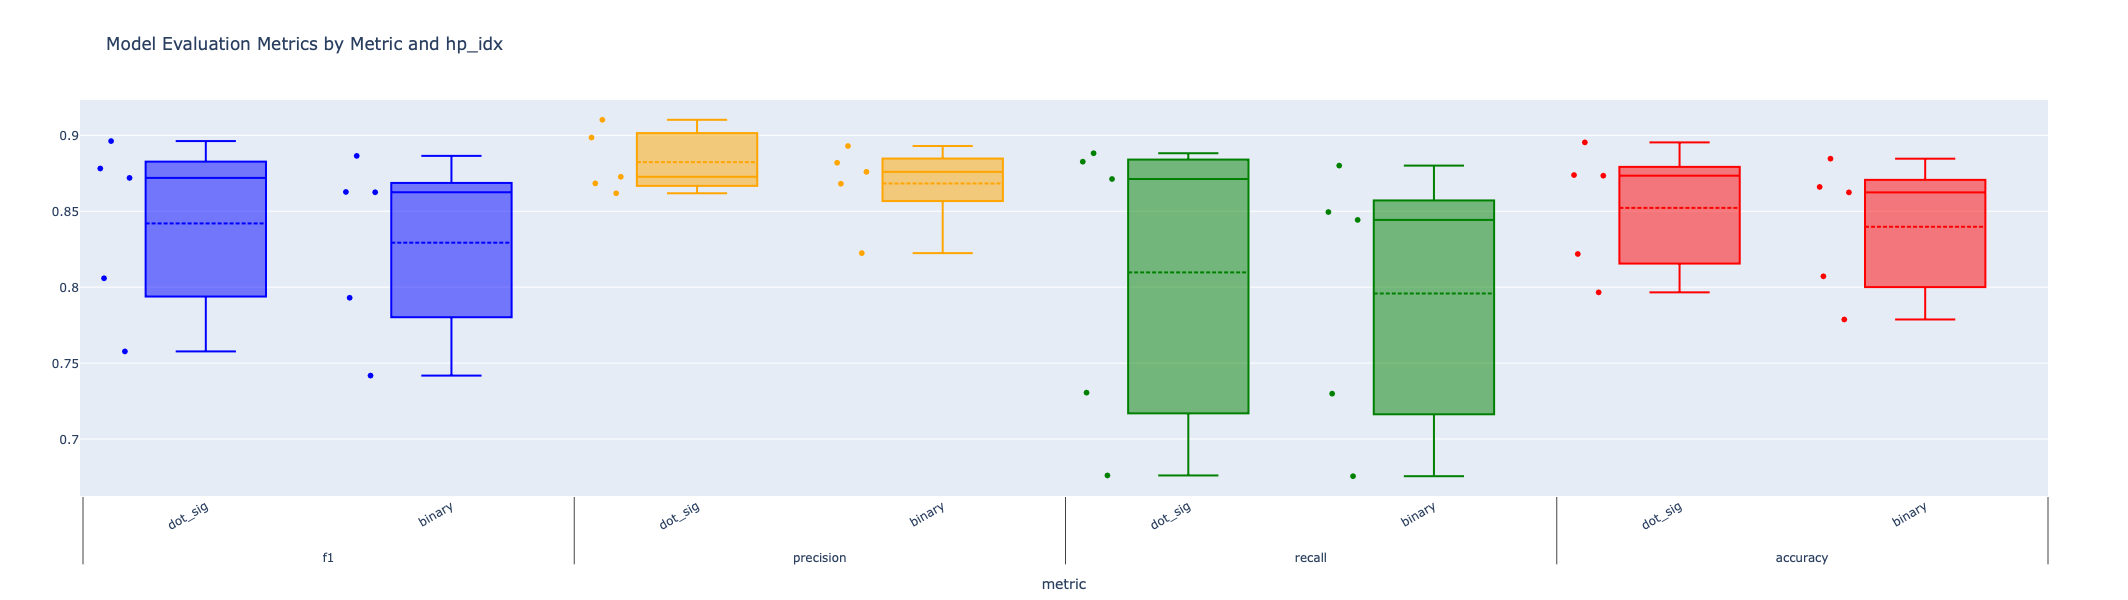

In [221]:
plot_combined_metrics(df_metrics)

In [ ]:
pd.read_csv('/projects/b1039/trw7841/hiec/artifacts/model_evals/gnn/284_hp_idx_split_2_of_5/version_0/metrics.csv')

In [ ]:
with Path('/projects/b1039/trw7841/hiec/artifacts/model_evals/gnn/284_hp_idx_split_2_of_5/version_0/hparams.yaml').open('r') as fi:
    hparams = yaml.load(fi, yaml.BaseLoader)